<a href="https://colab.research.google.com/github/opjns/Wildfire-prediction/blob/main/Wildfire_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Climate Conditions

In [5]:
import kagglehub
import pandas as pd
import os
# Download both datasets
path1 = kagglehub.dataset_download("ayoubjadouli/morocco-wildfire-predictions-2010-2022-ml-dataset")
file_path = os.path.join(path1, 'Date_final_dataset_balanced_float32.parquet')
df = pd.read_parquet(file_path)
df = df.head(20000)

100%|██████████| 199M/199M [00:01<00:00, 118MB/s]

Extracting files...


In [6]:
df = df[['latitude','longitude','NDVI','average_temperature_lag_1', 'precipitation_lag_1','dew_point_lag_1','wind_speed_lag_1','is_fire','acq_date']].rename(columns={
    'average_temperature_lag_1': 'Temperature',
    'precipitation_lag_1': 'Precipitation',
    'dew_point_lag_1': 'Humidity',
    'wind_speed_lag_1': 'Windspeed',
    'acq_date': 'Date'})

In [7]:
df.head(10)

,latitude,longitude,NDVI,Temperature,Precipitation,Humidity,Windspeed,is_fire,Date
0,31.390602,-4.254445,1139.0,73.500000,0.0,41.599998,6.200000,1.0,2015-05-28
1,33.832943,-5.188356,3223.0,45.200001,0.0,34.299999,5.400000,1.0,2017-12-05
2,35.385689,-5.684218,4987.0,64.500000,0.0,54.099998,21.299999,1.0,2021-11-19
3,30.122351,-7.498038,991.0,76.199997,0.0,23.799999,3.500000,0.0,2014-04-19
4,30.221554,-9.154314,2171.0,78.599998,0.0,46.299999,8.100000,1.0,2014-04-11
5,34.498917,-2.332624,1604.0,63.799999,0.0,54.000000,4.700000,0.0,2022-11-11
6,35.522633,-5.526712,5696.0,85.000000,0.0,52.099998,12.200000,1.0,2019-08-20
7,32.087673,-8.773463,1674.0,70.300003,0.0,58.500000,6.600000,0.0,2020-11-02
8,32.540138,-6.300411,2536.0,74.199997,0.0,58.099998,5.000000,1.0,2014-09-23
9,32.931473,-3.967042,1240.0,56.500000,0.0,30.700001,12.600000,0.0,2016-03-20


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column
df = df.drop('Date', axis=1)

print(df.head())

    latitude  longitude    NDVI  Temperature  Precipitation   Humidity  \
0  31.390602  -4.254445  1139.0    73.500000            0.0  41.599998   
1  33.832943  -5.188356  3223.0    45.200001            0.0  34.299999   
2  35.385689  -5.684218  4987.0    64.500000            0.0  54.099998   
3  30.122351  -7.498038   991.0    76.199997            0.0  23.799999   
4  30.221554  -9.154314  2171.0    78.599998            0.0  46.299999   

   Windspeed  is_fire  Year  Month  Day  
0   6.200000      1.0  2015      5   28  
1   5.400000      1.0  2017     12    5  
2  21.299999      1.0  2021     11   19  
3   3.500000      0.0  2014      4   19  
4   8.100000      1.0  2014      4   11  


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('is_fire', axis=1)
y = df['is_fire']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (14000, 10) (14000,)
Validation set shape: (3000, 10) (3000,)
Test set shape: (3000, 10) (3000,)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")


Validation Accuracy: 0.929


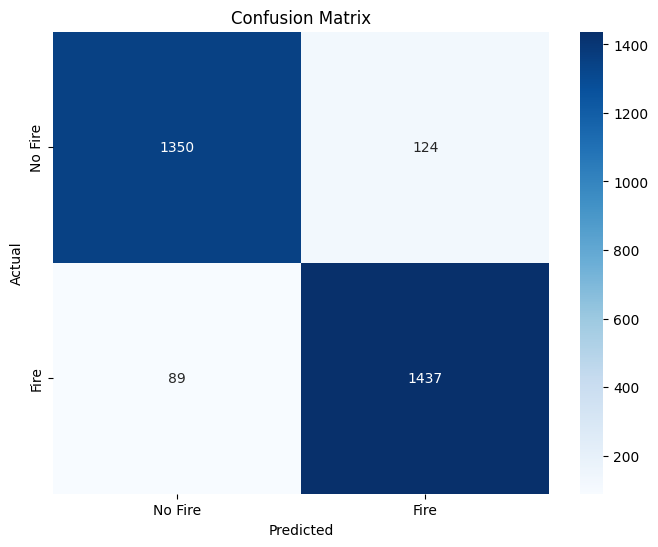

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_val and y_pred are already defined from the previous code

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [12]:
print(df[['Day','Month','Year']].max())

Day        31
Month      12
Year     2022
dtype: int32


#Images

In [ ]:
!git clone https://github.com/opjns/Wildfire-prediction.git

Cloning into 'Wildfire-prediction'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 167 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (167/167), 18.66 MiB | 11.22 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
!pip install tensorflow keras numpy matplotlib

In [ ]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Define the base directory where images are located
base_dir = '/content/Wildfire-prediction/Images'

# Define the directories for train, test, and validation sets
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'validation')

# Create the train, test, and validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Get the list of image files from the base_dir
image_files = [f for f in os.listdir(base_dir) if os.path.isfile(os.path.join(base_dir, f))]

# Split the files into training and remaining (test + validation)
train_files, remaining_files = train_test_split(image_files, test_size=0.3, random_state=42)

# Split the remaining files into test and validation (50/50 split of the remaining 30%)
test_files, val_files = train_test_split(remaining_files, test_size=0.5, random_state=42)

# Function to move files to the target directory
def move_files(file_list, source_dir, target_dir):
    for file_name in file_list:
        source_path = os.path.join(source_dir, file_name)
        target_path = os.path.join(target_dir, file_name)
        # Check if the source file exists before attempting to move
        if os.path.exists(source_path):
            shutil.move(source_path, target_path)
        else:
            print(f"Warning: File not found at source path: {source_path}")


# Move files to their respective directories
move_files(train_files, base_dir, train_dir)
move_files(test_files, base_dir, test_dir)
move_files(val_files, base_dir, val_dir)

print(f"Total images: {len(image_files)}")
print(f"Training images: {len(train_files)}")
print(f"Test images: {len(test_files)}")
print(f"Validation images: {len(val_files)}")

Total images: 125
Training images: 87
Test images: 19
Validation images: 19


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os # Import os

train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

# Image size and batch
img_size = (128, 128)
batch_size = 32

base_dir = '/content/Wildfire-prediction/Images'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation') # Note the correct directory name 'validation'
test_dir = os.path.join(base_dir, 'test')


train_data = train_gen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')
val_data = val_gen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')
test_data = test_gen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


#Streamlit

In [13]:
import joblib
joblib.dump(model, 'wildfire_model.py')

['wildfire_model.py']

In [14]:

!pip install -q streamlit

import streamlit as st
import joblib
import numpy as np

# Load the trained model
model = joblib.load('wildfire_model.py')

st.title('Wildfire Prediction')

st.write('Enter the following environmental conditions to predict the likelihood of a wildfire.')

# Input fields for the features used by the model
latitude = st.number_input('Latitude', value=31.79)
longitude = st.number_input('Longitude', value=-7.09)
NDVI = st.number_input('NDVI', value=0.5)
temperature = st.number_input('Temperature (Lag 1)', value=25.0)
precipitation = st.number_input('Precipitation (Lag 1)', value=0.0)
humidity = st.number_input('Dew Point (Lag 1)', value=10.0)
windspeed = st.number_input('Wind Speed (Lag 1)', value=5.0)
year = st.number_input('Year', value=2023, step=1)
month = st.number_input('Month', value=7, min_value=1, max_value=12, step=1)
day = st.number_input('Day', value=15, min_value=1, max_value=31, step=1)


# Create a feature array from the inputs
features = np.array([[latitude, longitude, NDVI, temperature, precipitation, humidity, windspeed, year, month, day]])

2025-05-26 09:08:46.090 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 09:08:46.179 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-26 09:08:46.179 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 09:08:46.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 09:08:46.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 09:08:46.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 09:08:46.184 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 09:08:46.185 Thread 'MainThread': mi

In [ ]:
!streamlit run wildfire_model.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.232.5.30:8501

